<a href="https://colab.research.google.com/github/dpkeee/ERA_S7/blob/main/S7_STEP1_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms,datasets



In [2]:
train_transforms = transforms.Compose([transforms.ColorJitter(brightness=0.40, contrast=0.4, saturation=0.40, hue=0.1),
                                      transforms.RandomAffine(degrees=7, shear=10, translate=(0.1, 0.1), scale=(0.8, 1.2)),
                                      transforms.RandomRotation((-7.0, 7.0), fill=(1,)),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.1307,), (0.3081,))])
test_transforms = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize((0.1307,), (0.3081,))])

In [3]:
train_ds = datasets.MNIST('./data',train=True,download=True,transform=train_transforms)
test_ds = datasets.MNIST('./data',train=False,download=True,transform=test_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 109182207.73it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 84063632.08it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 33752520.24it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13247933.77it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
type(train_ds),len(train_ds),train_ds,type(test_ds)

(torchvision.datasets.mnist.MNIST,
 60000,
 Dataset MNIST
     Number of datapoints: 60000
     Root location: ./data
     Split: Train
     StandardTransform
 Transform: Compose(
                ColorJitter(brightness=(0.6, 1.4), contrast=(0.6, 1.4), saturation=(0.6, 1.4), hue=(-0.1, 0.1))
                RandomAffine(degrees=[-7.0, 7.0], translate=(0.1, 0.1), scale=(0.8, 1.2), shear=[-10.0, 10.0])
                RandomRotation(degrees=[-7.0, 7.0], interpolation=nearest, expand=False, fill=(1,))
                ToTensor()
                Normalize(mean=(0.1307,), std=(0.3081,))
            ),
 torchvision.datasets.mnist.MNIST)

In [5]:
# dataloader arguments - something you'll fetch these from cmdprmt

cuda = torch.cuda.is_available()

dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)
train_loader = torch.utils.data.DataLoader(train_ds,**dataloader_args)
test_loader = torch.utils.data.DataLoader(test_ds,**dataloader_args)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [6]:
len(train_loader),len(test_loader),type(train_loader)

(469, 79, torch.utils.data.dataloader.DataLoader)

In [7]:
train_ds_data = train_ds.data;train_ds_label = train_ds.targets

In [8]:
type(train_ds_data),train_ds_data.shape,train_ds_label

(torch.Tensor, torch.Size([60000, 28, 28]), tensor([5, 0, 4,  ..., 5, 6, 8]))

In [9]:
dataiter = iter(train_loader)

In [10]:
len(dataiter),cuda

(469, True)

In [11]:
type(dataiter)

torch.utils.data.dataloader._MultiProcessingDataLoaderIter

In [12]:
images,labels = next(dataiter)

In [13]:
len(images),len(labels),images.shape,labels.shape

(128, 128, torch.Size([128, 1, 28, 28]), torch.Size([128]))

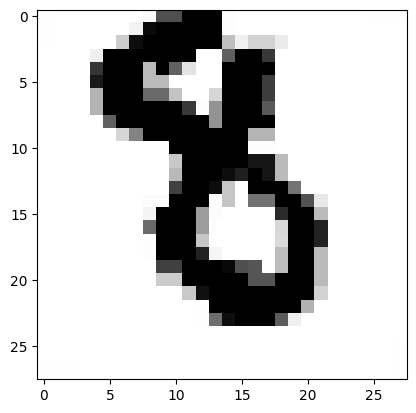

In [14]:
import matplotlib.pyplot as plt
plt.imshow(images[0].squeeze(),cmap= 'gray_r') #plot the first image from image dataset

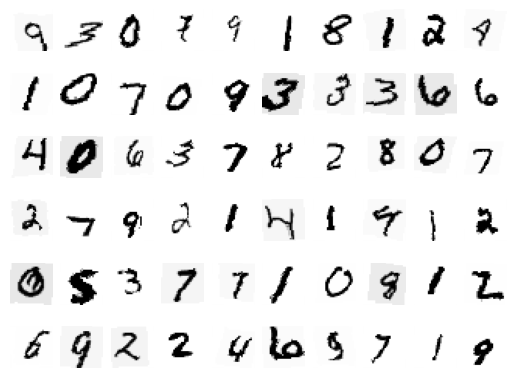

In [15]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [16]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()# Input Block
        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=8, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(8),
            nn.Dropout(drop_out),
            nn.ReLU()
        ) # output_size = 26; rf = 3

        # CONVOLUTION BLOCK 1
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(16),
            nn.Dropout(drop_out),
            nn.ReLU()
        ) # output_size = 24; rf = 5
        self.convblock3 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(16),
            nn.Dropout(drop_out),
            nn.ReLU()
        )

        self.trans1 = nn.Sequential(
            nn.MaxPool2d(2, 2),
            nn.Conv2d(in_channels=16, out_channels=1, kernel_size=(1, 1), padding=0, bias=False)

        ) # output_size = 12
        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=8, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(8),
            nn.Dropout(drop_out),
            nn.ReLU()
        )

        # CONVOLUTION BLOCK 2
        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(16),
            nn.Dropout(drop_out),

            nn.ReLU()
        ) # output_size = 10;rf = 11

        # OUTPUT BLOCK
        self.convblock6 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(10),
            nn.Dropout(drop_out),
            nn.ReLU()
        ) # output_size = 6;rf=19
        self.convblock7 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(10),
            nn.Dropout(drop_out),
            nn.ReLU()
        )
        self.convblock8 = nn.Sequential(
            #nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(6, 6), padding=0, bias=False)
            nn.AdaptiveAvgPool2d(1)
            # nn.BatchNorm2d(10), NEVER
            # nn.ReLU() NEVER!
        ) # output_siz
    def forward(self, x):
        x = self.convblock1(x) # 26
        x = self.convblock2(x)  # 24
        x = self.convblock3(x)
        x = self.trans1(x)
        x = self.convblock4(x)

        x = self.convblock5(x) # 7
        x = self.convblock6(x)

        x = self.convblock7(x) #3
        x = self.convblock8(x) #1
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)

In [17]:
!pip install torchsummary
from torchsummary import summary

In [18]:
use_cuda = torch.cuda.is_available()

device = torch.device('cuda' if use_cuda else 'cpu')

In [19]:
print(device)

cuda


In [20]:
drop_out=0.1
model = Net().to(device)
summary(model,input_size=(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
       BatchNorm2d-2            [-1, 8, 26, 26]              16
           Dropout-3            [-1, 8, 26, 26]               0
              ReLU-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,152
       BatchNorm2d-6           [-1, 16, 24, 24]              32
           Dropout-7           [-1, 16, 24, 24]               0
              ReLU-8           [-1, 16, 24, 24]               0
            Conv2d-9           [-1, 16, 22, 22]           2,304
      BatchNorm2d-10           [-1, 16, 22, 22]              32
          Dropout-11           [-1, 16, 22, 22]               0
             ReLU-12           [-1, 16, 22, 22]               0
        MaxPool2d-13           [-1, 16, 11, 11]               0
           Conv2d-14            [-1, 1,

In [21]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

def train(model, device, train_loader, optimizer, epoch):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes.
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    train_losses.append(loss)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm

    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

    test_acc.append(100. * correct / len(test_loader.dataset))

In [ ]:

from torch.optim.lr_scheduler import OneCycleLR
model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#scheduler = StepLR(optimizer, step_size=8, gamma=0.1)
scheduler = OneCycleLR(optimizer, max_lr=0.015,epochs=15, steps_per_epoch=len(train_loader))
EPOCHS = 15
drop_out=0.03
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

EPOCH: 0


  0%|          | 0/469 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Loss=1.5354161262512207 Batch_id=468 Accuracy=46.70: 100%|██████████| 469/469 [00:45<00:00, 10.41it/s]



Test set: Average loss: 1.1857, Accuracy: 7600/10000 (76.00%)

EPOCH: 1


Loss=1.1779959201812744 Batch_id=192 Accuracy=66.05:  41%|████      | 193/469 [00:20<00:31,  8.78it/s]